In [32]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation, sanity_check, plot_policy
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import SolverMdp, SolverIRL, SolverApp

### Setting

In [33]:
# Parameters
n = 10
wind_intensity = 0.3 # between 0 and 1
gamma = 0.99

In [34]:
grid = np.zeros((n, n))
goal = [                    
        [n-1, n-2], 
        [n-1]
        ]
obstacles = [
                [int(n/2)],
                [i for  i in range(0,int(n/1.2))]
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n))

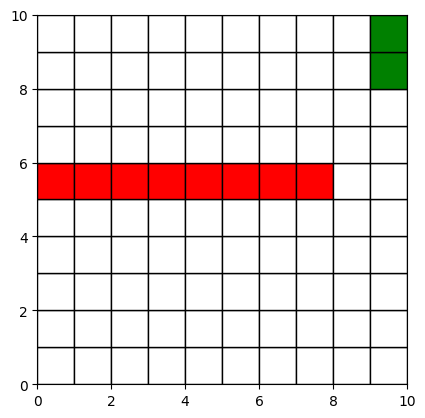

In [35]:
plot_gridworld(grid, obstacles, goal)

In [36]:
def transitions(s1, s , a, goal): #go from s to s1 with action a
    if a == "up":
        if s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 1
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 100
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 0
    return r

In [37]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 01 10:20:07 PM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Sep 01 10:20:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 01 10:20:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 01 10:20:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 01 10:20:07 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 01 10:20:07 PM: Compiling problem (target solver=CLARABEL

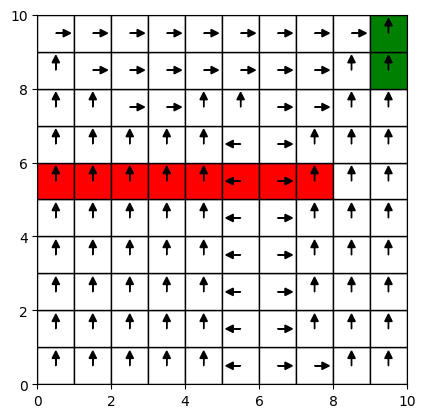

In [38]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])
plot_policy(grid, visualize_policy, obstacles, goal)

### Sanity Check

In [39]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma)
u_true = sanity_check(gridworld, cost)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 01 10:20:07 PM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Sep 01 10:20:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 01 10:20:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 01 10:20:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 01 10:20:07 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 01 10:20:07 PM: Compiling problem (target solver=CLARABEL

### Exploration

In [40]:
def cost_prime(s, a, goal, obstacles):
    r = 10
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 5
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 0
    return r

In [41]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, mu_e.value, cost_prime)
gridworld.get_mdp_app(transform=False)
gridworld.mdp_app.build_T()

In [42]:
solver = SolverApp(gridworld.mdp_app, gridworld.c_hat, gridworld.mdp_app.mu_e)
prob, c_exp, u_exp = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 01 10:20:08 PM: Your problem has 500 variables, 400 constraints, and 0 parameters.
(CVXPY) Sep 01 10:20:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 01 10:20:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 01 10:20:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 01 10:20:08 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 01 10:20:08 PM: Compiling problem (target solver=CLARABEL

In [43]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_exp.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_exp.value[i]

UP


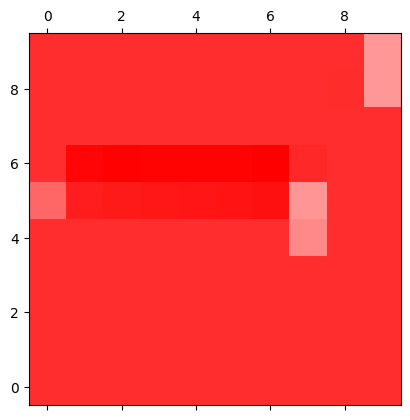

DOWN


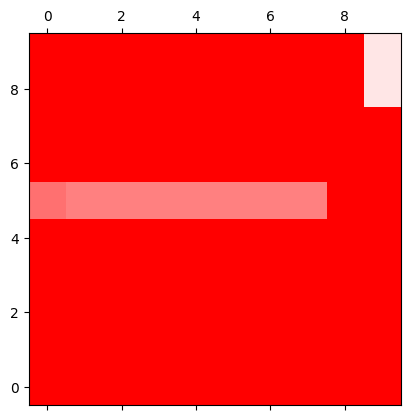

LEFT


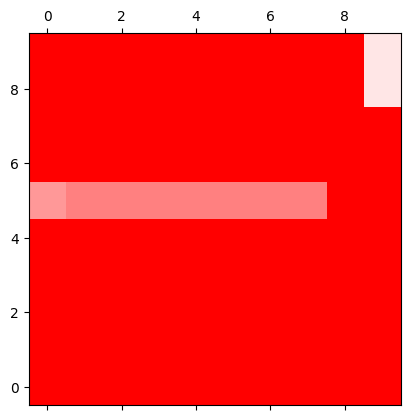

RIGHT


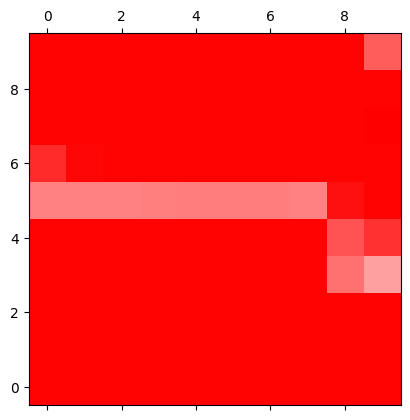

In [44]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

In [55]:
print("|| c_exp - c_true || = ", np.linalg.norm(c_exp.value - gridworld.c))
print("|| c_exp - c_hat || = ", np.linalg.norm(c_exp.value - gridworld.c_hat))
print("|| u_exp - u_true || = ", np.linalg.norm(u_exp.value - u_true))

|| c_exp - c_true || =  557.5935096845861
|| c_exp - c_hat || =  23.155473902503275
|| u_exp - u_true || =  6611.704217645452


### Inverse Optimization for Cost Function

In [46]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, mu_e.value, cost_prime)
gridworld.get_mdp_IRL(transform=False)
gridworld.mdp_IRL.build_T()

In [47]:
solver = SolverIRL(gridworld.mdp_IRL, gridworld.c_hat, gridworld.mdp_IRL.mu_e)
prob, c_IRL, u_IRL = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 01 10:20:08 PM: Your problem has 500 variables, 401 constraints, and 0 parameters.
(CVXPY) Sep 01 10:20:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 01 10:20:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 01 10:20:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 01 10:20:08 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 01 10:20:08 PM: Compiling problem (target solver=CLARABEL

In [48]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_IRL.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_IRL.value[i]
u_reconstructed = np.zeros((n, n))
for i in range(len(u_IRL.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u_IRL.value[i]

UP


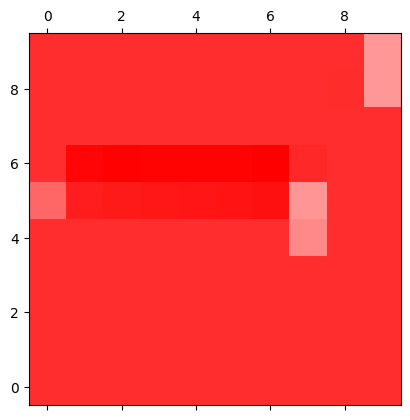

DOWN


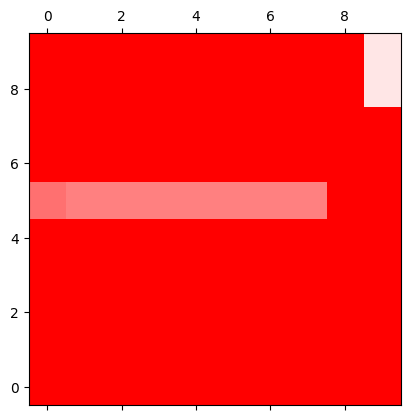

LEFT


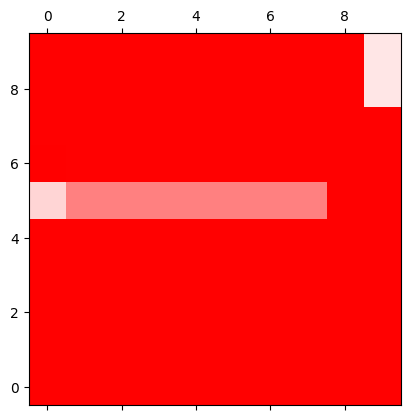

RIGHT


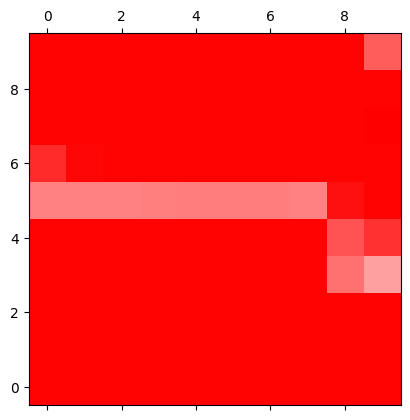

In [49]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

In [58]:
print("App problem")
print("|| c_exp - c_true || = ", np.linalg.norm(c_exp.value - gridworld.c))
print("|| c_exp - c_hat || = ", np.linalg.norm(c_exp.value - gridworld.c_hat))
print("|| u_exp - u_true || = ", np.linalg.norm(u_exp.value - u_true))
print(" ")

print("IRL problem")
print("|| c_IRL - c_true || = ", np.linalg.norm(c_IRL.value - gridworld.c))
print("|| c_IRL - c_hat || = ", np.linalg.norm(c_IRL.value - gridworld.c_hat))
print("|| u_IRL - u_true || = ", np.linalg.norm(u_IRL.value - u_true))
print(" ")
## Compare with the app problem ###
print("Comparison with the app problem")
print("|| c_IRL - c_exp || = ", np.linalg.norm(c_IRL.value - c_exp.value))
print("|| u_IRL - u_exp || = ", np.linalg.norm(u_IRL.value - u_exp.value))


App problem
|| c_exp - c_true || =  557.5935096845861
|| c_exp - c_hat || =  23.155473902503275
|| u_exp - u_true || =  6611.704217645452
 
IRL problem
|| c_IRL - c_true || =  558.0116296052762
|| c_IRL - c_hat || =  23.37564168062308
|| u_IRL - u_true || =  6611.70250318679
 
Comparison with the app problem
|| c_IRL - c_exp || =  2.401093801936701
|| u_IRL - u_exp || =  0.0017265077060680187
